Decison for indicator

Secondary: NV.IND.TOTL.ZS https://data.worldbank.org/indicator/NV.IND.TOTL.ZS?view=chart
Primary: ER.H2O.FWIN.ZS https://data.worldbank.org/indicator/ER.H2O.FWIN.ZS

The basic assumption is that a similar content of % GDP of industry lead to a similar & of total water withdrawl of industry

Here we load the data

In [13]:
import wbgapi as wb

data = wb.data.DataFrame(['ER.H2O.FWIN.ZS','NV.IND.TOTL.ZS'], time=[2020] )

data.columns = ['Water share industry (%)', 'GDP share industry (%)']

print(data)

         Water share industry (%)  GDP share industry (%)
economy                                                  
ABW                           NaN                     NaN
AFE                      6.113730               25.455262
AFG                      0.831988               14.031699
AFW                      8.911070               27.142315
AGO                     33.947294               45.678242
...                           ...                     ...
XKX                           NaN               27.558457
YEM                      1.823282                     NaN
ZAF                     21.313440               23.272787
ZMB                      8.269720               40.257899
ZWE                      2.157087               32.767517

[266 rows x 2 columns]


import numpy as np
* Get information about all economies (countries and regions)
* all_economies = wb.economy.Series(id='all')



In [49]:
import pandas as pd
from stuff import util

import importlib
importlib.reload(util)

print(util.region_cleaner(data).columns)



Index(['Water share industry (%)', 'GDP share industry (%)'], dtype='object')


In [51]:
print(util.set_split(data))

                                    Water share industry (%)  \
    name                                                       
AFG Afghanistan                                     0.831988   
AGO Angola                                         33.947294   
ALB Albania                                         2.035623   
ARE United Arab Emirates                            0.742776   
ARG Argentina                                      10.587612   
...                                                      ...   
VCT St. Vincent and the Grenadines                  0.023524   
VNM Viet Nam                                        3.747409   
ZAF South Africa                                   21.313440   
ZMB Zambia                                          8.269720   
ZWE Zimbabwe                                        2.157087   

                                    GDP share industry (%)  
    name                                                    
AFG Afghanistan                              

C:\Users\admin\Documents\GitHub\Sustanal\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\Documents\GitHub\Sustanal\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


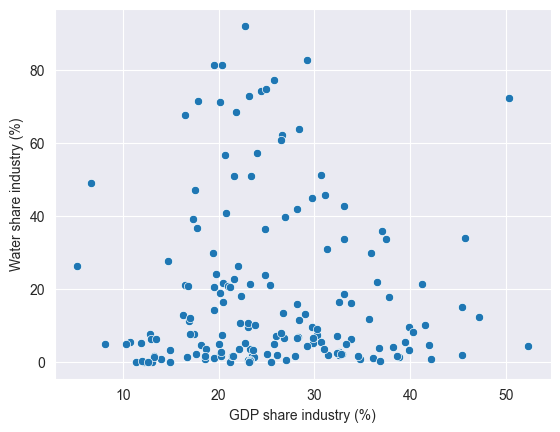

C:\Users\admin\Documents\GitHub\Sustanal\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\Documents\GitHub\Sustanal\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


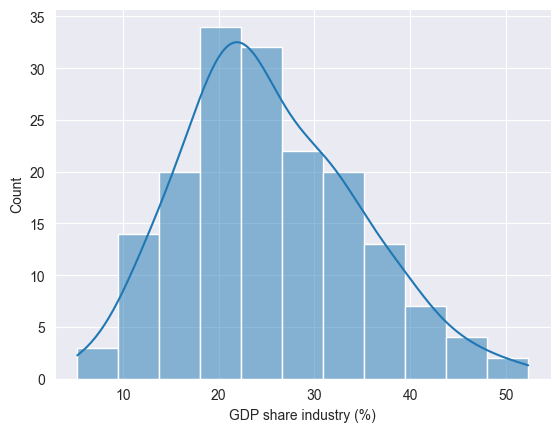

C:\Users\admin\Documents\GitHub\Sustanal\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\Documents\GitHub\Sustanal\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


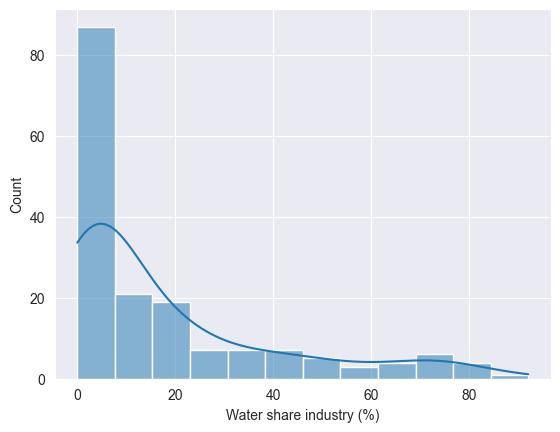

In [52]:
util.plot_stuff(data)

In [53]:
print(util.imput_calc(data))

                  Water share industry (%)  GDP share industry (%)  \
    name                                                             
ABW Aruba                              NaN                     NaN   
AFG Afghanistan                   0.831988               14.031699   
AGO Angola                       33.947294               45.678242   
ALB Albania                       2.035623               20.114530   
AND Andorra                            NaN               12.660158   
...                                    ...                     ...   
XKX Kosovo                             NaN               27.558457   
YEM Yemen, Rep.                   1.823282                     NaN   
ZAF South Africa                 21.313440               23.272787   
ZMB Zambia                        8.269720               40.257899   
ZWE Zimbabwe                      2.157087               32.767517   

                  Water share industry (%)_imputed_simple  \
    name                    

C:\Users\admin\Documents\GitHub\Sustanal\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\Documents\GitHub\Sustanal\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\Documents\GitHub\Sustanal\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\admin\Documents\GitHub\Sustanal\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

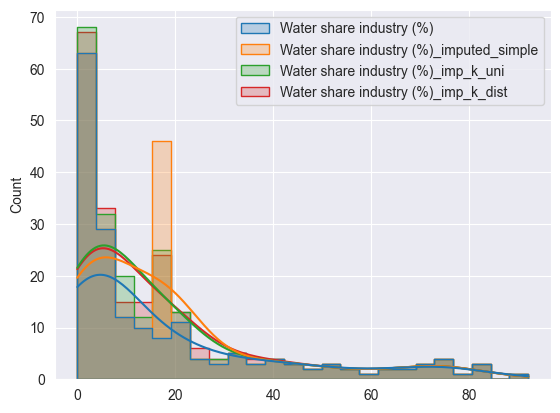

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(util.imput_calc(data).iloc[:,[0,2,3,4]], element='step', common_norm = False, kde = True)
plt.savefig('graphs\histplot.jpeg')

Analysis:
1. imputed simple is definetly problematic because it skews the distribution quite tremendously obiously because we take the average. You can assess this best in the skewed distribution H20 in direction of higher values.
2.


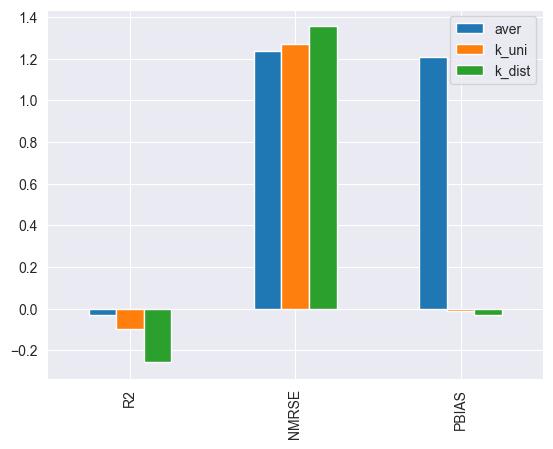

In [55]:
util.imp_valid(data).plot(kind='bar')
plt.savefig('graphs\Validation.jpeg')


* R2: Outcome is quite devistating. None of the models fits the real data well. R2 interpretation the variance in the observed data cannot be adressed by the model-> Taking the average of th H20 would be the fit with least variance.
* NMRSE is far away from zero which indicates a bad fit
* aver is biased towards higher values = overfit. This could be also nicely assessed in the distribution
* K_uni and K-kist tend to underfit however they have both a very small bias of <3%
* As a result K_uni and K_aver are not biased but are highly affected by fluctuations in the test data
* If you have to choose chosse K_uni

# Task 6

In [56]:
imp_data = util.imput_calc(data)
valid_data = util.imp_valid(data)
# Create an ExcelWriter object and specify the Excel file name
file_name = 'data\output.xlsx'
with pd.ExcelWriter(file_name) as writer:
    imp_data.to_excel(writer, sheet_name='imputed_data')
    valid_data.to_excel(writer, sheet_name='validation_imputation')



 sklearn.metrics.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', force_finite=True)[source]¶

(coefficient of determination) regression score function.

Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). In the general case when the true y is non-constant, a constant model that always predicts the average y disregarding the input features would get a

score of 0.0.

In the particular case when y_true is constant, the

score is not finite: it is either NaN (perfect predictions) or -Inf (imperfect predictions). To prevent such non-finite numbers to pollute higher-level experiments such as a grid search cross-validation, by default these cases are replaced with 1.0 (perfect predictions) or 0.0 (imperfect predictions) respectively. You can set force_finite to False to prevent this fix from happening.

Note: when the prediction residuals have zero mean, the
score is identical to the Explained Variance score.

<Figure size 1000x2000 with 0 Axes>

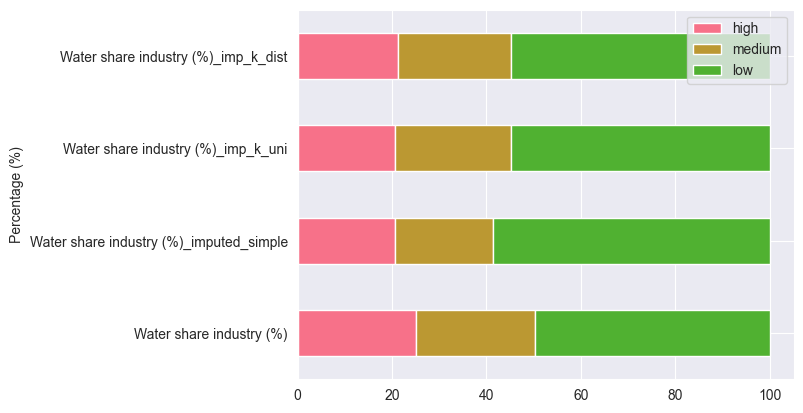

In [68]:

importlib.reload(util)
result_df = util.clustering(data)

result_df_percentage = result_df.div(result_df.sum(axis=0), axis=1) * 100
color_palette = sns.color_palette("husl")
plt.figure(figsize=(10, 20))
#plt.subplots_adjust(left= .5)  # Adjust the left margin as needed
result_df_percentage.T.plot(kind='barh', stacked=True, color=color_palette)
plt.ylabel('Percentage (%)')
plt.savefig('graphs\porportion_classes')
plt.show()

